# CrashPy

**Application : Data Analysis with Python** 

This is a crash course in Python, with Jupyter Notebook as the User Interface (IDE). I hope you'll like the experience. -- [Sourav Sen Gupta](http://souravsengupta.com/)

Python is a fun language to learn, and really easy to pick up even if you are new to programming. In fact, quite often, Python is easier to pick up if you do not have any programming experience whatsoever. Python is high level programming language, targeted at students and professionals from diverse backgrounds.

Python has two flavors -- Python 2 and Python 3. This set of examples are in Python 3, written and executed in the beautifully simple IDE Jupyter Notebook. Note that Jupyter has set up a `localhost:8888` server to render the notebook in your computer's browser. It can render anything now -- should be fun!

> [Module 1](Module1_DataTypes.ipynb) : Data Types in Python  
> [Module 2](Module2_DataStructures.ipynb) : Data Structures in Python   
> [Module 3](Module3_ConditionLoop.ipynb) : Conditions and Loops in Python   
> [Module 4](Module4_Functions.ipynb) : Functions and Modules in Python   
> [Module 5](Module5_PythonComputing.ipynb) : Computing with Python

This material is heavilly inspired by two wonderful lecture series in Python -- [Python4Maths by Andreas Ernst](https://gitlab.erc.monash.edu.au/andrease/Python4Maths) and [Python Lectures by Rajath Kumar](https://github.com/rajathkmp/Python-Lectures)

**License Declaration** : Following the lead from the inspirations for this material, and the *spirit* of Python education and development, all modules of this work are licensed under the Creative Commons Attribution 3.0 Unported License. To view a copy of this license, visit http://creativecommons.org/licenses/by/3.0/.

---

## Exploring the Pokemon Dataset

Python is currently the language of choice for Data Analysis; the required libraries are `NumPy`, `Pandas`, `MatPlotLib`, `SeaBorn` and `Scikit-Learn`. In this example, we use the **"Pokemon with stats"** dataset from Kaggle, curated by *Alberto Barradas* (source: https://www.kaggle.com/abcsds/pokemon).

In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

### Import CSV file into a DataFrame

In [2]:
# Read the CSV Data
pkmndata = pd.read_csv('pokemonData.csv')

In [3]:
# Check the first few rows of the dataset
pkmndata.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


Description of the dataset, as available on Kaggle, is as follows.
Learn more : https://en.wikipedia.org/wiki/List_of_Pok%C3%A9mon

> **\#** : ID for each Pokemon (runs from 1 to 721)  
> **Name** : Name of each Pokemon  
> **Type 1** : Each Pokemon has a basic Type, this determines weakness/resistance to attacks  
> **Type 2** : Some Pokemons are dual type and have a Type 2 value (set to nan otherwise)  
> **Total** : Sum of all stats of a Pokemon, a general guide to how strong a Pokemon is  
> **HP** : Hit Points, defines how much damage a Pokemon can withstand before fainting  
> **Attack** : The base modifier for normal attacks by the Pokemon (e.g., scratch, punch etc.)  
> **Defense** : The base damage resistance of the Pokemon against normal attacks  
> **SP Atk** : Special Attack, the base modifier for special attacks (e.g. fire blast, bubble beam)  
> **SP Def** : Special Defense, the base damage resistance against special attacks  
> **Speed** : Determines which Pokemon attacks first each round  
> **Generation** : Each Pokemon belongs to a certain Generation  
> **Legendary** : Legendary Pokemons are powerful, rare, and hard to catch

In [4]:
# Check the Data Type
print("Data type : ", type(pkmndata))
print("Data dims : ", pkmndata.shape)
print()
print(pkmndata.dtypes)

Data type :  <class 'pandas.core.frame.DataFrame'>
Data dims :  (800, 13)

#              int64
Name          object
Type 1        object
Type 2        object
Total          int64
HP             int64
Attack         int64
Defense        int64
Sp. Atk        int64
Sp. Def        int64
Speed          int64
Generation     int64
Legendary       bool
dtype: object


### Statistics on Numeric Variables

In [5]:
# Extract only the numeric data variables
numDF = pd.DataFrame(pkmndata[["HP", "Attack", "Defense", "Sp. Atk", "Sp. Def", "Speed"]])

# Summary Statistics for all Variables
numDF.describe()

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
count,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000
mean,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500
std,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474
min,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000
25%,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000
50%,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000
75%,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000
max,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000


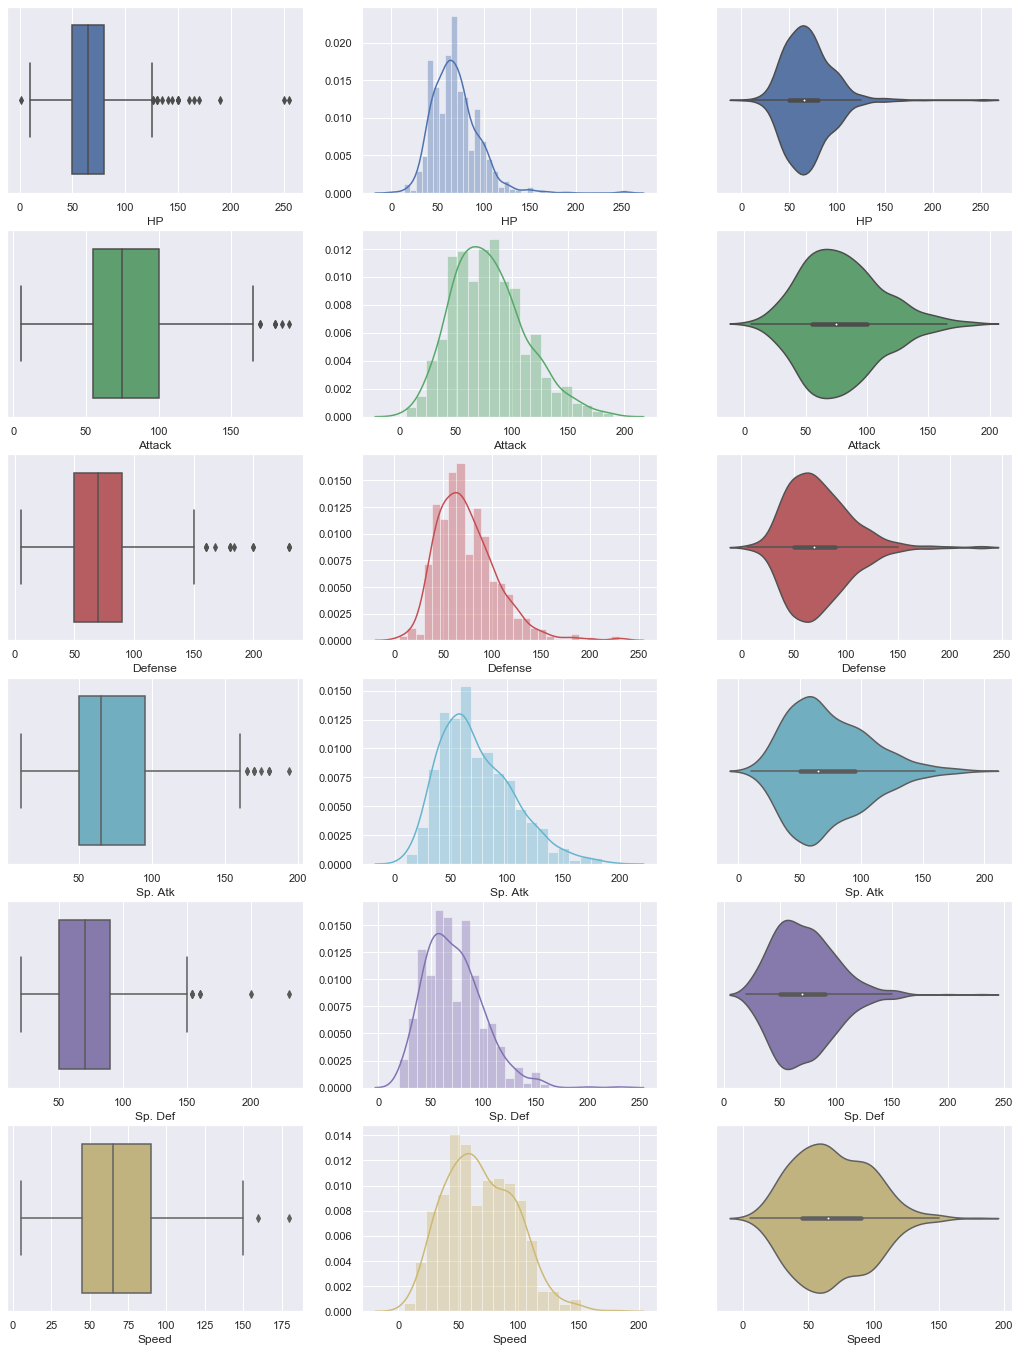

In [6]:
# Visualize the distributions of all variables
f, axes = plt.subplots(6, 3, figsize=(18, 24))
color_list = ["b", "g", "r", "c", "m", "y"]

count = 0
for var in numDF:
    sb.boxplot(numDF[var], ax = axes[count,0], color = color_list[count])
    sb.distplot(numDF[var], ax = axes[count,1], color = color_list[count])
    sb.violinplot(numDF[var], ax = axes[count,2], color = color_list[count])
    count += 1

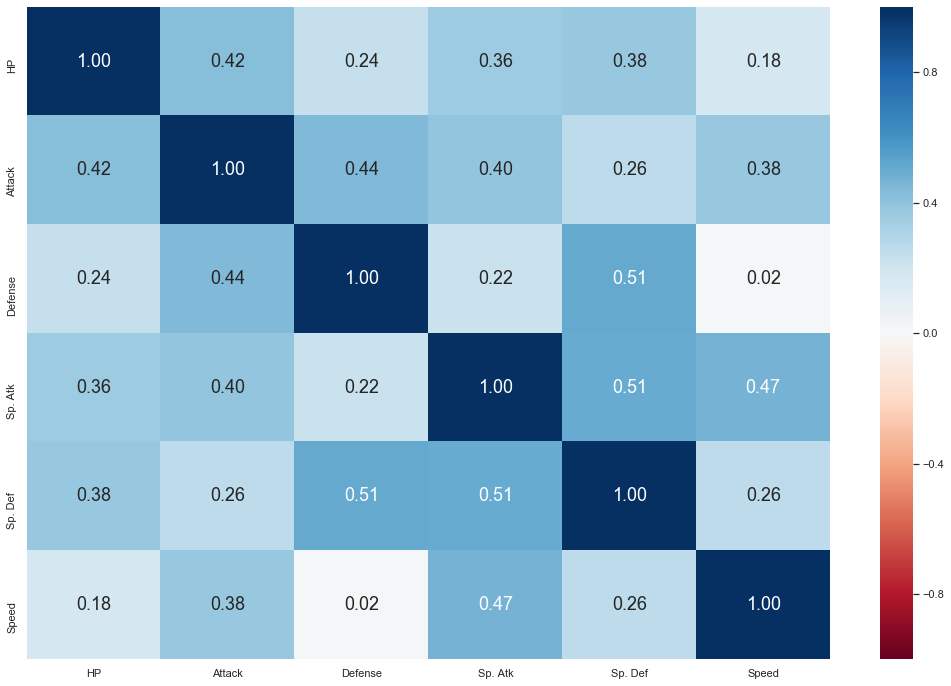

In [7]:
# Heatmap of the Correlation Matrix
f, axes = plt.subplots(1, 1, figsize=(18, 12))
sb.heatmap(numDF.corr(), vmin = -1, vmax = 1, annot = True, fmt = ".2f", annot_kws = {"size": 18}, cmap = "RdBu")

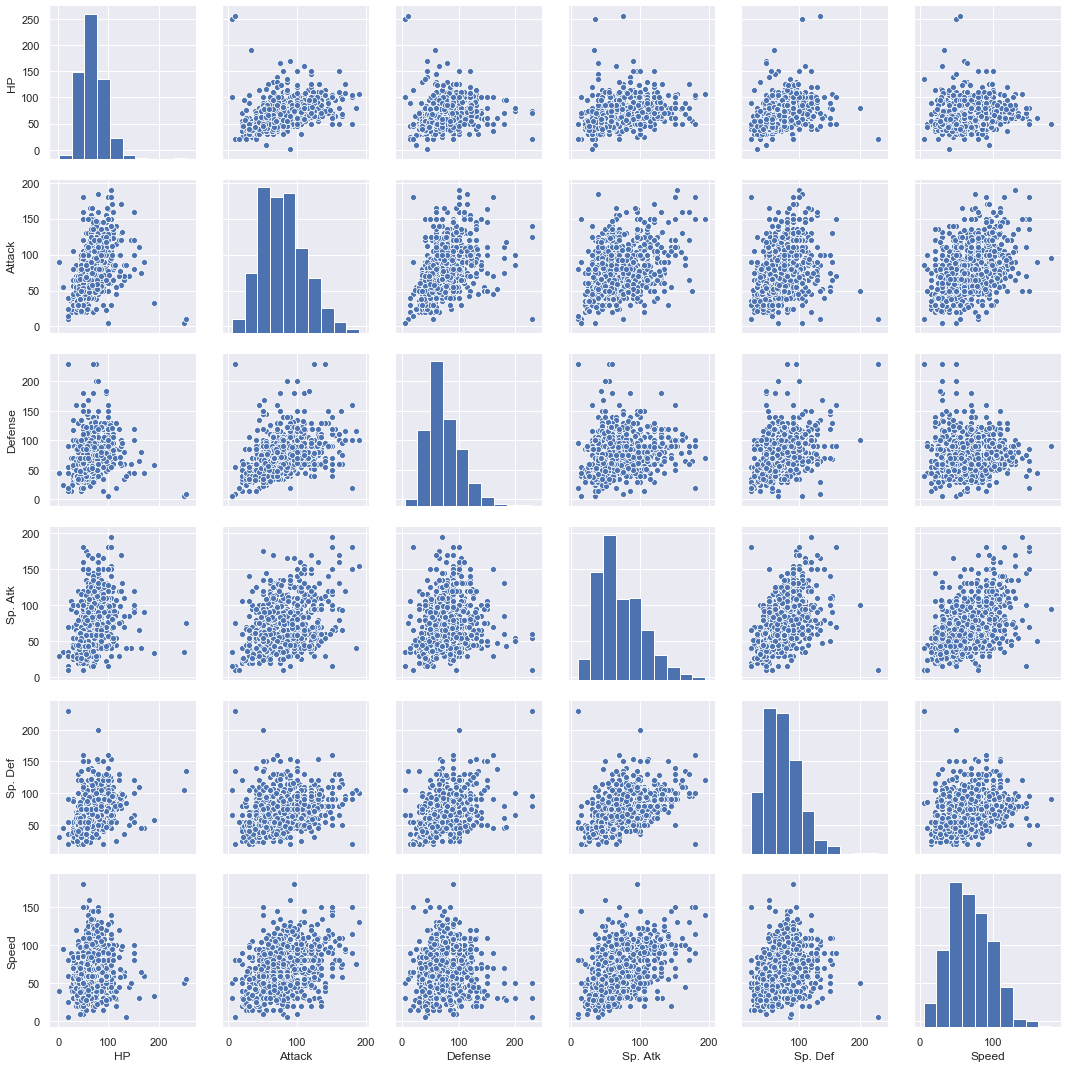

In [8]:
# Draw pairs of variables against one another
sb.pairplot(data = numDF)

### Statistics on Categorical Variables

Number of Generations : 6
1    166
5    165
3    160
4    121
2    106
6     82
Name: Generation, dtype: int64


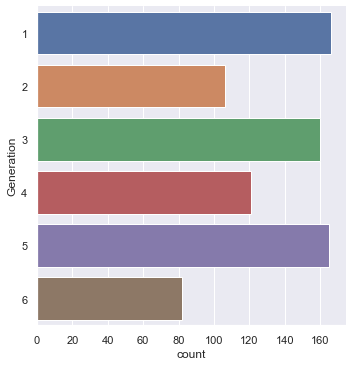

In [9]:
# Generations in the Dataset
print("Number of Generations :", len(pkmndata["Generation"].unique()))

# Pokemons in each Generation
print(pkmndata["Generation"].value_counts())
sb.catplot(y = "Generation", data = pkmndata, kind = "count")

Number of Primary Types : 18
Water       112
Normal       98
Grass        70
Bug          69
Psychic      57
Fire         52
Rock         44
Electric     44
Dragon       32
Ground       32
Ghost        32
Dark         31
Poison       28
Steel        27
Fighting     27
Ice          24
Fairy        17
Flying        4
Name: Type 1, dtype: int64


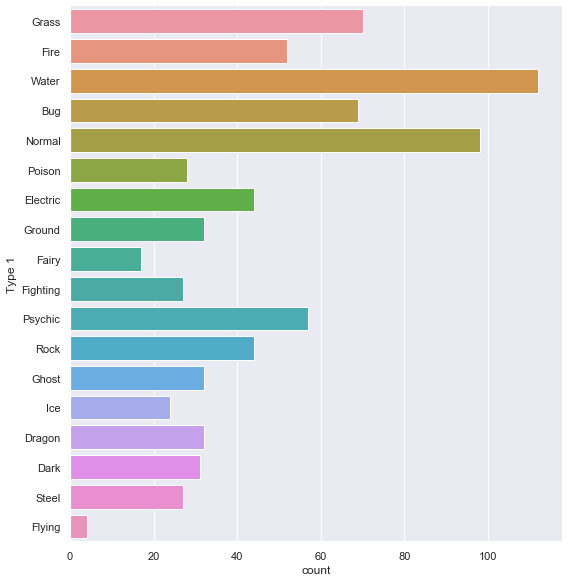

In [10]:
# Primary Types in the Dataset
print("Number of Primary Types :", len(pkmndata["Type 1"].unique()))

# Pokemons of each Primary Type
print(pkmndata["Type 1"].value_counts())
sb.catplot(y = "Type 1", data = pkmndata, kind = "count", height = 8)

Number of Secondary Types : 18
Flying      97
Ground      35
Poison      34
Psychic     33
Fighting    26
Grass       25
Fairy       23
Steel       22
Dark        20
Dragon      18
Rock        14
Ice         14
Ghost       14
Water       14
Fire        12
Electric     6
Normal       4
Bug          3
Name: Type 2, dtype: int64


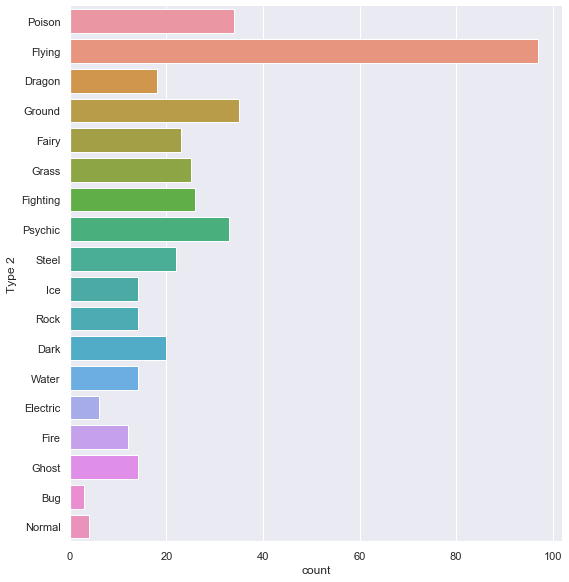

In [11]:
# Secondary Types in the Dataset
print("Number of Secondary Types :", len(pkmndata["Type 2"].dropna().unique()))

# Pokemons of each Secondary Type
print(pkmndata["Type 2"].dropna().value_counts())
sb.catplot(y = "Type 2", data = pkmndata, kind = "count", height = 8)

---

### Import HTML table into a DataFrame

In [12]:
# Importing the HTML file from the URL
html_data = pd.read_html('https://en.wikipedia.org/wiki/List_of_actors_with_two_or_more_Academy_Awards_in_acting_categories')

In [13]:
# Check the dataset you imported
print("Data type : ", type(html_data))
print("HTML tables : ", len(html_data))

Data type :  <class 'list'>
HTML tables :  2


In [14]:
# Check the individual tables
html_data[0]

,Actor/Actress,Best Actor/Actress Awards,Best Supporting Actor/Actress Awards,Total awards,Total nominations
0,Katharine Hepburn †,Morning Glory (1933) Guess Who's Coming to Din...,NaN,4,12
1,Daniel Day-Lewis,My Left Foot (1989) There Will Be Blood (2007)...,NaN,3,6
2,Meryl Streep,Sophie's Choice (1982) The Iron Lady (2011),Kramer vs. Kramer (1979),3,21
3,Jack Nicholson,One Flew Over the Cuckoo's Nest (1975) As Good...,Terms of Endearment (1983),3,12
4,Ingrid Bergman †,Gaslight (1944) Anastasia (1956),Murder on the Orient Express (1974),3,7
5,Walter Brennan †,NaN,Come and Get It (1936) Kentucky (1938) The Wes...,3,4
6,Bette Davis †,Dangerous (1935) Jezebel (1938),NaN,2,10
7,Spencer Tracy †,Captains Courageous (1937) Boys Town (1938),NaN,2,9
8,Marlon Brando †,On the Waterfront (1954) The Godfather (1972),NaN,2,8
9,Jane Fonda,Klute (1971) Coming Home (1978),NaN,2,7


In [15]:
# Save the table as Pandas Dataframe
awardsDF = pd.DataFrame(html_data[0])
awardsDF.head()

,Actor/Actress,Best Actor/Actress Awards,Best Supporting Actor/Actress Awards,Total awards,Total nominations
0,Katharine Hepburn †,Morning Glory (1933) Guess Who's Coming to Din...,NaN,4,12
1,Daniel Day-Lewis,My Left Foot (1989) There Will Be Blood (2007)...,NaN,3,6
2,Meryl Streep,Sophie's Choice (1982) The Iron Lady (2011),Kramer vs. Kramer (1979),3,21
3,Jack Nicholson,One Flew Over the Cuckoo's Nest (1975) As Good...,Terms of Endearment (1983),3,12
4,Ingrid Bergman †,Gaslight (1944) Anastasia (1956),Murder on the Orient Express (1974),3,7


In [16]:
# Check the statistics for Total awards
awardsDF['Total awards'].describe()

count    42.000000
mean      2.166667
std       0.437101
min       2.000000
25%       2.000000
50%       2.000000
75%       2.000000
max       4.000000
Name: Total awards, dtype: float64

In [17]:
# Check the statistics for Total nominations
awardsDF['Total nominations'].describe()

count    42.000000
mean      5.619048
std       3.554128
min       2.000000
25%       3.000000
50%       5.000000
75%       7.000000
max      21.000000
Name: Total nominations, dtype: float64

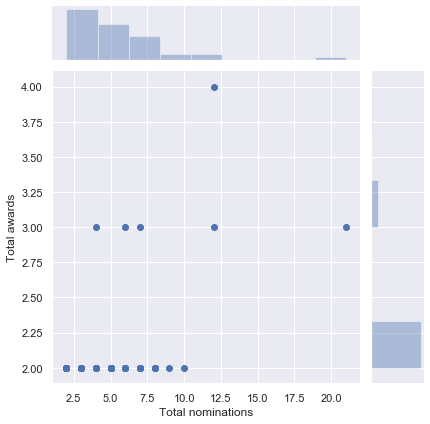

In [18]:
# Check the relationship between nominations and awards
sb.jointplot(x = awardsDF['Total nominations'], y = awardsDF['Total awards'])

#### Quick Tasks

- Do a similar analysis on the Olympic 2016 medals : https://en.wikipedia.org/wiki/2016_Summer_Olympics_medal_table